<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 1
#### *Tobias Bavasso Piizzi*

# Enunciado
<img src="./circuito1.png" align="center" width="400"/>

Para el siguiente circuito conocido como **Filtro Pasa Todo o Rotador de fase**, se
pide: Obtener la función transferencia V2/V1 ( módulo , fase y diagrama de polos y ceros) si
R2/R1= 1.

Utilizar un simulador para obtener la respuesta de fase adoptando R=R3= 1 k Ω ; C=1 μF.

## Transferencia

La resolución detallada se puede encontrar [aquí](./tarea.pdf) 

Se plantean las ecuaciones en las entradas del **OPAMP**

+ Analizando la _entrada inversora_
\begin{equation}
\label{eqn:inv}
\frac{V_1(s)-V_a(s)}{R_1} + \frac{V_2(s)-V_a(s)}{R_2} = 0
\end{equation}

+ Analizando la _entrada no inversora_
\begin{equation}
\label{eqn:noinv}
(V_1(s)-V_a(s)) \cdot sC - \frac{V_a(s)}{R_3} = 0
\end{equation}

+ Finalmente _combinando_ las ecuaciones \ref{eqn:inv} y \ref{eqn:noinv}

\begin{equation}
\label{eqn:trans}
T(s) = \frac{V_2(s)}{V_1(s)} = \frac{s-\frac{R_2}{C \cdot R_1 \cdot R_3}}{s+\frac{1}{C \cdot R_3}} = \frac{s-1000}{s+1000}
\end{equation}





## Simulación Circuital
Para realizar la simulación circuital se utiliza el software [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) para poder visualizar la respuesta en frecuencia del circuito. Observando el gráfico podemos confirmar que estamos en presencia de un **filtro pasa todo** ya que el módulo de la transferencia muestra una **banda plana para todas las frecuencias** con una **ganancia** aproximada de **0dB**. _**Recordar que una ganancia de 0dB equivale a no amplificar ni atenuar la señal**_.
<img src="./bode.png" align="center" width="1000"/>



## Simulación Matemática


-1000.0 1000.0


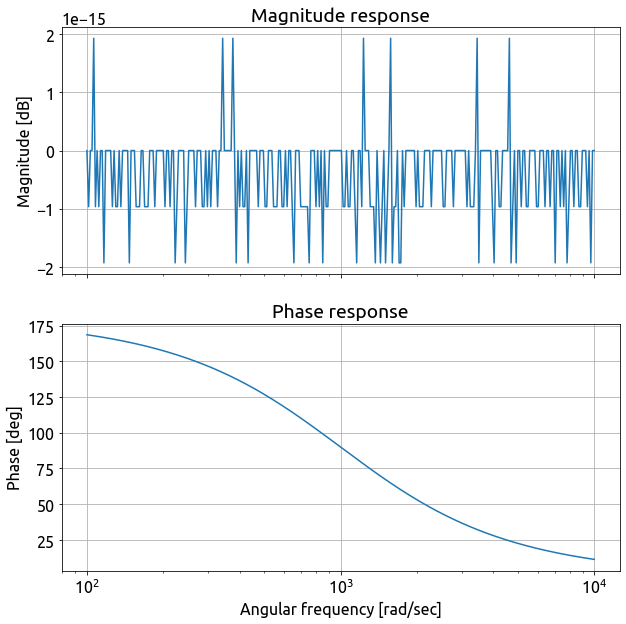

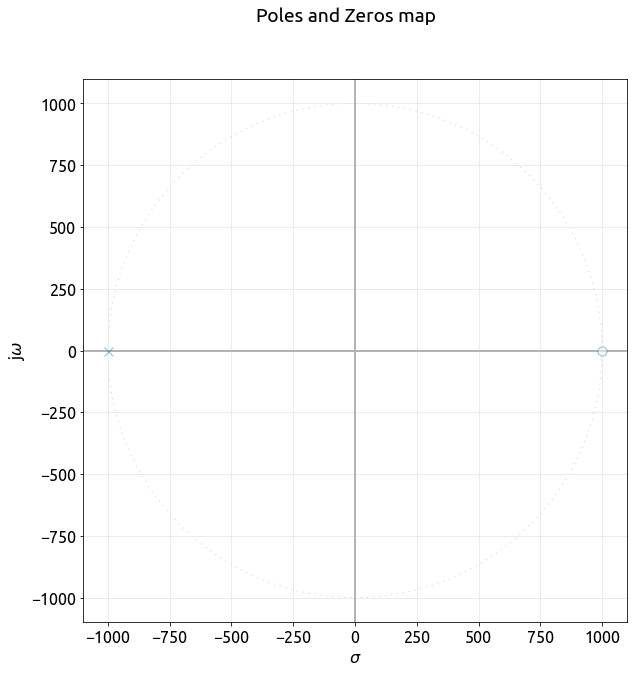

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 14 14:48:32 2021

@author: toto
"""

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################

"""
#Q = 0.6           # sobreamortiguado
#Q = np.sqrt(2)/2  # -------------- 
Q = 5             # subamortiguado

# Luego de analizar diferentes Q, probar desnormalizar
######################################################
w0 = 1
"""

#Selecciono los componentes
R1  = 1e3
R2  = 1e3
R3  = 1e3
C   = 1e-6   

wc = - R2/(C*R1*R3)
wp = 1/(C*R3)

print(wc,wp)
# Cargamos la funcion transferencia

num = np.array([ 1, wc ])
den = np.array([ 1, wp ])

H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()